# Image Captioning

[Hugging Face](https://huggingface.co/) is an AI-focused company whose goal is to advance and democratize AI. The company originally concentrated on NLP models but has since expanded its library to include pretrained models of other types, including [image-classification](https://huggingface.co/tasks/image-classification) models and [object-detection](https://huggingface.co/tasks/object-detection) models. Let's use one of Hugging Face's vision encoder-decoder models to caption an image — a task that combines object detection with NLP. Note that this example requires PyTorch, which you can install with a `pip install torch` command if it isn't installed already.

Start by loading the image:

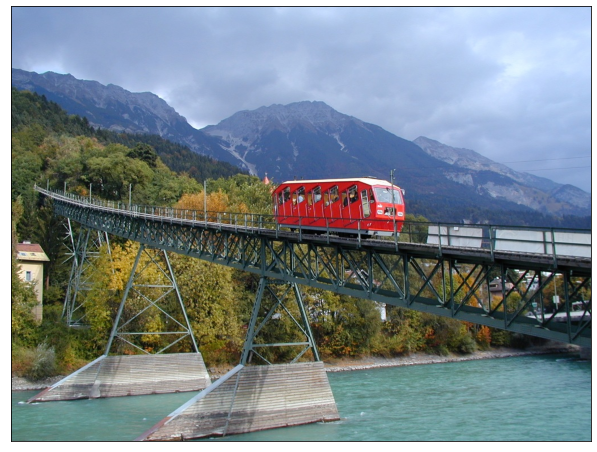

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('Data/innsbruck.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

Now load a pretrained model and submit the image to it for captioning:

In [2]:
import torch
from transformers import ViTFeatureExtractor, AutoTokenizer, VisionEncoderDecoderModel

def predict(image, extractor, tokenizer, model):
    pixel_values = extractor(images=image, return_tensors="pt").pixel_values

    with torch.no_grad():
        output_ids = model.generate(pixel_values, max_length=16, num_beams=4, return_dict_in_generate=True).sequences

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds

loc = 'ydshieh/vit-gpt2-coco-en'
feature_extractor = ViTFeatureExtractor.from_pretrained(loc)
tokenizer = AutoTokenizer.from_pretrained(loc)
model = VisionEncoderDecoderModel.from_pretrained(loc)

predict(image, feature_extractor, tokenizer, model)

['a train traveling over a bridge over a river']

This model was trained on the [COCO dataset](https://cocodataset.org/#home), so it recognizes 80 different object ranging from people to bicycles.